In [12]:
import pandas as pd
import seaborn as sns
import os

In [13]:
path_project = '/home/luis/data/gwasResult/'
th_genom = '1000genomes_sas_freq.afreq'
df_genom = pd.read_csv(os.path.join(path_project, th_genom), sep='\t')
df_genom

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_FREQS,OBS_CT
0,1,rs2100355088,C,T,Y,0.001953,1024
1,1,rs1570503875,G,T,Y,0.001953,1024
2,1,rs2100467282,T,C,Y,0.001953,1024
3,1,rs1642278192,A,C,Y,0.002930,1024
4,1,rs2100548072,T,C,Y,0.000977,1024
...,...,...,...,...,...,...,...
22544209,22,rs9616985,T,C,Y,0.058594,1024
22544210,22,rs141330630,T,C,Y,0.002930,1024
22544211,22,rs6010092,T,C,Y,0.000977,1024
22544212,22,rs374867791,G,T,Y,0.042969,1024


In [14]:
gwas_file = 'annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid'
df_gwas = pd.read_csv(os.path.join(path_project, gwas_file), sep='\t')
df_gwas

,#CHROM,POS,ID,REF,ALT,PROVISIONAL_REF?,A1,OMITTED,A1_FREQ,FIRTH?,TEST,N,BETA,SE,L95,U95,Z_STAT,P,ERRCODE
0,1,727242,rs61769339,G,A,Y,A,G,0.181916,N,ADD,11170,0.032694,0.035398,-0.036686,0.102073,0.923596,0.355696,.
1,1,727717,rs61769340,G,C,Y,C,G,0.764772,N,ADD,11170,-0.020861,0.032212,-0.083996,0.042273,-0.647617,0.517232,.
2,1,730869,rs200188737,C,T,Y,T,C,0.019785,N,ADD,11170,0.064970,0.098778,-0.128631,0.258570,0.657738,0.510707,.
3,1,732369,rs1315713498,G,A,Y,A,G,0.012802,N,ADD,11170,-0.039917,0.121250,-0.277563,0.197729,-0.329213,0.741994,.
4,1,740738,rs146067153,C,T,Y,T,C,0.026634,N,ADD,11170,0.019702,0.084698,-0.146303,0.185706,0.232612,0.816063,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414141,22,50790460,rs201882178,T,G,Y,G,T,0.251567,N,ADD,11170,0.025040,0.031369,-0.036443,0.086523,0.798241,0.424731,.
8414142,22,50790482,rs80012748,G,A,Y,A,G,0.201835,N,ADD,11170,0.043437,0.034111,-0.023420,0.110293,1.273390,0.202881,.
8414143,22,50791377,rs9616985,T,C,Y,C,T,0.057565,N,ADD,11170,-0.017370,0.058404,-0.131840,0.097099,-0.297417,0.766148,.
8414144,22,50795915,rs374867791,G,T,Y,T,G,0.017771,N,ADD,11170,-0.129506,0.104755,-0.334822,0.075811,-1.236270,0.216359,.


In [15]:
df = pd.merge(df_genom, df_gwas, on=['ID', 'ALT', 'REF'], how='inner')
df

,#CHROM_x,ID,REF,ALT,PROVISIONAL_REF?_x,ALT_FREQS,OBS_CT,#CHROM_y,POS,PROVISIONAL_REF?_y,...,FIRTH?,TEST,N,BETA,SE,L95,U95,Z_STAT,P,ERRCODE
0,1,rs61769339,G,A,Y,0.176758,1024,1,727242,Y,...,N,ADD,11170,0.032694,0.035398,-0.036686,0.102073,0.923596,0.355696,.
1,1,rs61769340,G,C,Y,0.792969,1024,1,727717,Y,...,N,ADD,11170,-0.020861,0.032212,-0.083996,0.042273,-0.647617,0.517232,.
2,1,rs200188737,C,T,Y,0.024414,1024,1,730869,Y,...,N,ADD,11170,0.064970,0.098778,-0.128631,0.258570,0.657738,0.510707,.
3,1,rs146067153,C,T,Y,0.028320,1024,1,740738,Y,...,N,ADD,11170,0.019702,0.084698,-0.146303,0.185706,0.232612,0.816063,.
4,1,rs546155830,A,C,Y,0.015625,1024,1,758377,Y,...,N,ADD,11170,0.034732,0.137669,-0.235095,0.304559,0.252287,0.800819,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201610,22,rs201882178,T,G,Y,0.293945,1024,22,50790460,Y,...,N,ADD,11170,0.025040,0.031369,-0.036443,0.086523,0.798241,0.424731,.
8201611,22,rs80012748,G,A,Y,0.251953,1024,22,50790482,Y,...,N,ADD,11170,0.043437,0.034111,-0.023420,0.110293,1.273390,0.202881,.
8201612,22,rs9616985,T,C,Y,0.058594,1024,22,50791377,Y,...,N,ADD,11170,-0.017370,0.058404,-0.131840,0.097099,-0.297417,0.766148,.
8201613,22,rs374867791,G,T,Y,0.042969,1024,22,50795915,Y,...,N,ADD,11170,-0.129506,0.104755,-0.334822,0.075811,-1.236270,0.216359,.


In [18]:
df.shape[0]-df_gwas.shape[0]

-212531

<Axes: xlabel='ALT_FREQS', ylabel='A1_FREQ'>

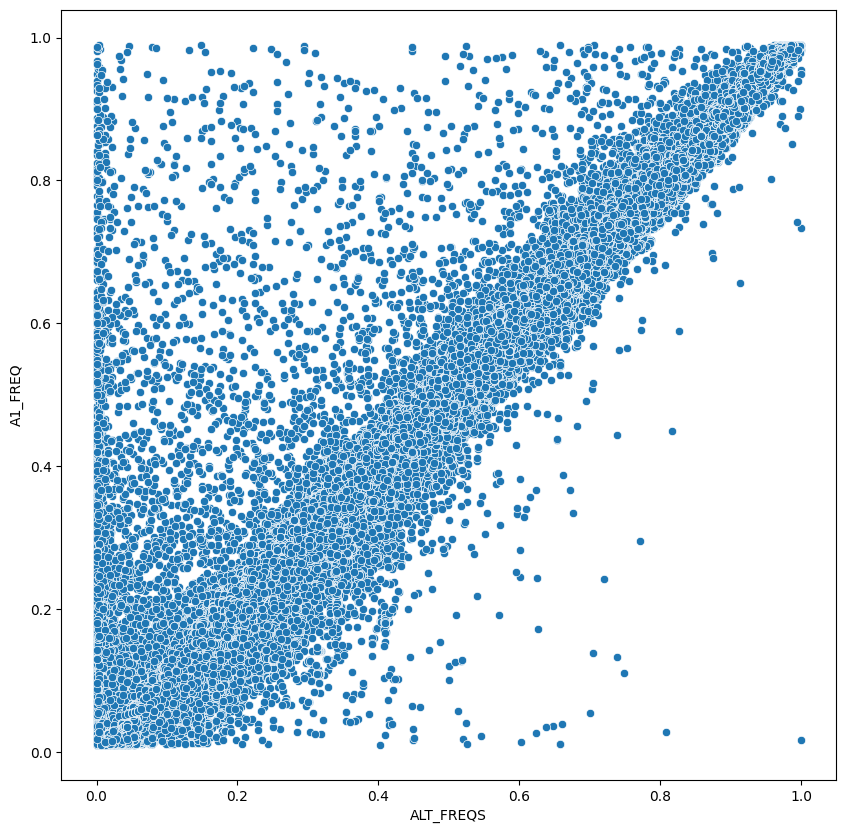

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

sns.scatterplot(x='ALT_FREQS', y='A1_FREQ', data=df)

In [5]:
import pandas as pd
import os

folder = '/home/luis/data/gwasResult/'

df_top = pd.read_table(
    os.path.join(folder, 'meta_analysis_indian_multi_final1.tbl'), sep='\t', usecols=['MarkerName', 'Allele1', 'Allele2']
)
df_top.head(5)

,MarkerName,Allele1,Allele2
0,rs2326918,a,g
1,rs7929618,c,g
2,rs66941928,t,c
3,rs6039163,t,c
4,rs530960868,t,g


In [6]:
df_top['MarkerName'].to_csv(os.path.join(folder, 'snp_id.txt'), index=False, header=False)

In [13]:
import gzip

for k in range(1,23):

    print(k)

    with open(f"/home/luis/Pictures/ref_vcf/homo_sapiens-chr{k}.vcf", "r") as f:
        lines = f.readlines()

    # Remove lines that start with '##'
    filtered_lines = [line for line in lines if not line.startswith("##")]

    # Optionally save the filtered lines to a new file
    with open(f"/home/luis/Pictures/ref_txt/homo_sapiens-chr{k}.txt", "w") as f:
        f.writelines(filtered_lines)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
for k in range(1,23):
    df_chr1 = pd.read_csv(f"/home/luis/Pictures/ref_txt/homo_sapiens-chr{k}.txt", sep='\t', usecols=['#CHROM',	'POS','ID'])
    df_chr1.to_csv(f"/home/luis/Pictures/ref_txt/homo_sapiens-chr{k}.csv", sep='\t', index=False)

In [4]:
import requests

def get_snp_positions(rsids):
    base_url = "https://rest.ensembl.org/variation/human/"
    headers = {"Content-Type": "application/json"}
    snp_data = {}

    for rsid in rsids:
        response = requests.get(base_url + rsid + "?", headers=headers)
        if response.ok:
            data = response.json()
            snp_data[rsid] = {
                "chromosome": data["mappings"][0]["seq_region_name"],
                "position": data["mappings"][0]["start"]
            }
        else:
            snp_data[rsid] = {"chromosome": None, "position": None}
    return snp_data

# Example usage
rsid_list = ["rs2326918", "rs7929618", "rs66941928"]
snp_positions = get_snp_positions(rsid_list)
print(snp_positions)

{'rs2326918': {'chromosome': '6', 'position': 130518946}, 'rs7929618': {'chromosome': '11', 'position': 135027849}, 'rs66941928': {'chromosome': '3', 'position': 176948961}}


In [9]:
merged_chunks = []

for chunk in pd.read_csv(os.path.join(folder, 'extracted_columns_GRCh38_CHR_BP.tsv'), sep='\t', chunksize=1000000):
    merged_chunks.append(
        pd.merge(chunk, df_top, on='MarkerName', how='inner')
    )

final_df = pd.concat(merged_chunks, ignore_index=True)

In [10]:
final_df

,CHR:BP,MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,Direction,HetISq,HetChiSq,HetDf,HetPVal
0,1:727242,rs61769339,a,g,0.8205,0.0034,0.8181,0.8252,-0.0252,0.0289,0.3845,--,0.0,0.136,1,0.7118
1,1:727717,rs61769340,c,g,0.2352,0.0000,0.2352,0.2352,0.0209,0.0322,0.5172,+?,0.0,0.000,0,1.0000
2,1:730869,rs200188737,t,c,0.9847,0.0078,0.9802,0.9982,-0.1059,0.0857,0.2166,--,0.0,0.694,1,0.4049
3,1:732369,rs1315713498,a,g,0.9872,0.0000,0.9872,0.9872,0.0399,0.1212,0.7420,+?,0.0,0.000,0,1.0000
4,1:740738,rs146067153,t,c,0.9705,0.0036,0.9659,0.9734,-0.0385,0.0665,0.5624,--,0.0,0.129,1,0.7192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641101,HG2521_PATCH:188430,rs542450690,a,g,0.9876,0.0000,0.9876,0.9876,-0.0127,0.1241,0.9186,-?,0.0,0.000,0,1.0000
10641102,HG2521_PATCH:189079,rs139233982,a,g,0.9894,0.0000,0.9894,0.9894,0.1646,0.1384,0.2343,+?,0.0,0.000,0,1.0000
10641103,HG2521_PATCH:189249,rs76902403,a,g,0.9277,0.0294,0.9089,0.9739,-0.0287,0.0460,0.5320,--,0.0,0.001,1,0.9751
10641104,HG2521_PATCH:189517,rs138389259,t,g,0.0108,0.0000,0.0108,0.0108,-0.1601,0.1369,0.2422,-?,0.0,0.000,0,1.0000


In [11]:
final_df['CHR'] = final_df['CHR:BP'].apply(lambda x: x.split(':')[0])
final_df['BP'] = final_df['CHR:BP'].apply(lambda x: x.split(':')[1])
final_df

,CHR:BP,MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,Direction,HetISq,HetChiSq,HetDf,HetPVal,CHR,BP
0,1:727242,rs61769339,a,g,0.8205,0.0034,0.8181,0.8252,-0.0252,0.0289,0.3845,--,0.0,0.136,1,0.7118,1,727242
1,1:727717,rs61769340,c,g,0.2352,0.0000,0.2352,0.2352,0.0209,0.0322,0.5172,+?,0.0,0.000,0,1.0000,1,727717
2,1:730869,rs200188737,t,c,0.9847,0.0078,0.9802,0.9982,-0.1059,0.0857,0.2166,--,0.0,0.694,1,0.4049,1,730869
3,1:732369,rs1315713498,a,g,0.9872,0.0000,0.9872,0.9872,0.0399,0.1212,0.7420,+?,0.0,0.000,0,1.0000,1,732369
4,1:740738,rs146067153,t,c,0.9705,0.0036,0.9659,0.9734,-0.0385,0.0665,0.5624,--,0.0,0.129,1,0.7192,1,740738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641101,HG2521_PATCH:188430,rs542450690,a,g,0.9876,0.0000,0.9876,0.9876,-0.0127,0.1241,0.9186,-?,0.0,0.000,0,1.0000,HG2521_PATCH,188430
10641102,HG2521_PATCH:189079,rs139233982,a,g,0.9894,0.0000,0.9894,0.9894,0.1646,0.1384,0.2343,+?,0.0,0.000,0,1.0000,HG2521_PATCH,189079
10641103,HG2521_PATCH:189249,rs76902403,a,g,0.9277,0.0294,0.9089,0.9739,-0.0287,0.0460,0.5320,--,0.0,0.001,1,0.9751,HG2521_PATCH,189249
10641104,HG2521_PATCH:189517,rs138389259,t,g,0.0108,0.0000,0.0108,0.0108,-0.1601,0.1369,0.2422,-?,0.0,0.000,0,1.0000,HG2521_PATCH,189517


In [12]:
final_df.to_csv(os.path.join(folder, 'CHR_BP_meta_analysis_indian_multi_final1.tsv'), sep='\t', index=False)

In [15]:
final_df['CHR'].value_counts().reset_index().to_csv(os.path.join(folder, 'CHRomosomes.csv'), sep='\t', index=False)

In [17]:
chroms = [str(chrom) for chrom in range(1, 23)]
final_df['keep'] = final_df['CHR'].apply(lambda x: True if x in chroms else False)
final_df[final_df['keep']]

,CHR:BP,MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,Direction,HetISq,HetChiSq,HetDf,HetPVal,CHR,BP,keep
0,1:727242,rs61769339,a,g,0.8205,0.0034,0.8181,0.8252,-0.0252,0.0289,0.3845,--,0.0,0.136,1,0.7118,1,727242,True
1,1:727717,rs61769340,c,g,0.2352,0.0000,0.2352,0.2352,0.0209,0.0322,0.5172,+?,0.0,0.000,0,1.0000,1,727717,True
2,1:730869,rs200188737,t,c,0.9847,0.0078,0.9802,0.9982,-0.1059,0.0857,0.2166,--,0.0,0.694,1,0.4049,1,730869,True
3,1:732369,rs1315713498,a,g,0.9872,0.0000,0.9872,0.9872,0.0399,0.1212,0.7420,+?,0.0,0.000,0,1.0000,1,732369,True
4,1:740738,rs146067153,t,c,0.9705,0.0036,0.9659,0.9734,-0.0385,0.0665,0.5624,--,0.0,0.129,1,0.7192,1,740738,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854862,22:50795915,rs374867791,t,g,0.9828,0.0020,0.9822,0.9897,0.1291,0.1004,0.1987,++,0.0,0.000,1,0.9892,22,50795915,True
9854863,22:50797531,rs200189535,t,c,0.1049,0.0000,0.1049,0.1049,0.0073,0.0600,0.9031,?+,0.0,0.000,0,1.0000,22,50797531,True
9854864,22:50797551,rs5771026,a,g,0.7767,0.0000,0.7767,0.7767,-0.0607,0.0687,0.3767,?-,0.0,0.000,0,1.0000,22,50797551,True
9854865,22:50798635,rs3896457,t,c,0.3907,0.0000,0.3907,0.3907,0.0025,0.0959,0.9792,?+,0.0,0.000,0,1.0000,22,50798635,True


In [7]:
df.to_csv(os.path.join(folder, 'pooled_meta_analysis_luxgiant_multi1_hrc.csv'), sep='\t', index=False)